<a href="https://colab.research.google.com/github/Rakeshyrc/image-detection-Computer-Vision-projects/blob/main/PACKING_detection-custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
!unzip -q /content/packing_data.zip  -d ../

In [ ]:
# Train YOLOv5s on custom_data.yaml for  epochs
!python train.py --img 640 --batch 3 --epochs 60 --data /content/yolov5/data/custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=60, batch_size=3, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

In [ ]:
#CONF CHANGE ACCORDING TO PERFORMANCE
!python detect.py --weights /content/yolov5/runs/train/exp3/weights/best.pt  --img 640 --conf 0.25 --source /content/hh.jpg

detect: weights=['/content/yolov5/runs/train/exp3/weights/best.pt'], source=/content/hh.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-211-g94e943e Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/hh.jpg: 576x640 1 DAMAGED, 43.2ms
Speed: 0.5ms pre-process, 43.2ms inference, 109.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp11


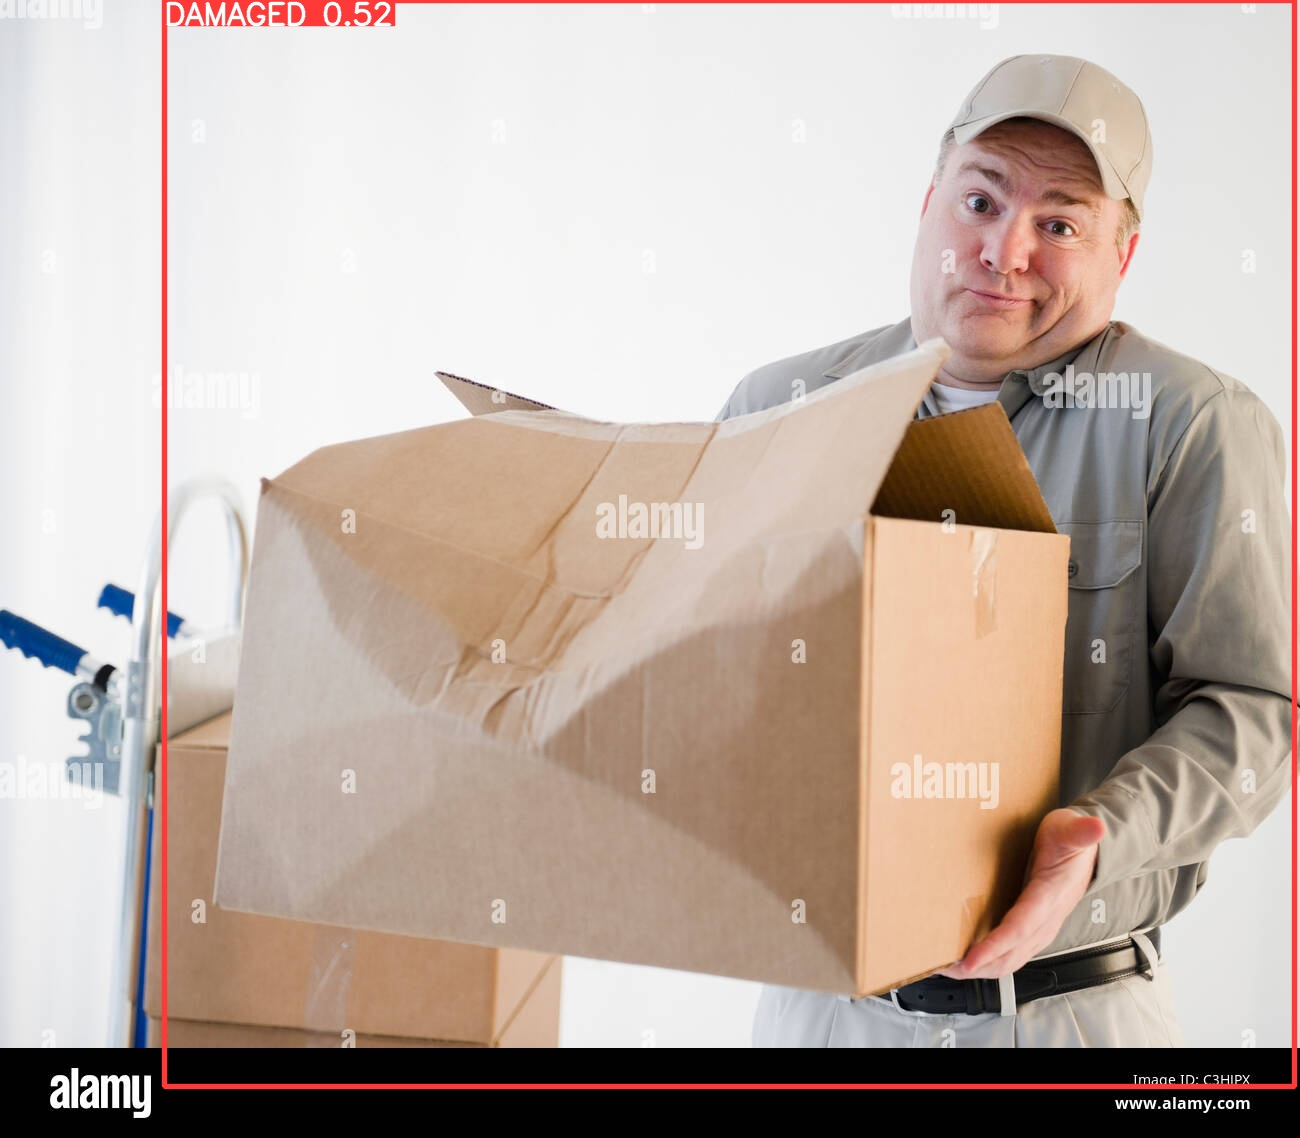

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp11/hh.jpg'):
    display(Image(filename=imageName))
    print("\n")

# **CAM TRY**

In [ ]:
import torch
from model import *

# Load the trained model
model = torch.load('/content/yolov5/runs/train/exp3/weights/best.pt')


In [ ]:
import torch
from PIL import Image
from torchvision.transforms import functional as F

# Load the trained model
model = torch.load('/content/yolov5/runs/train/exp/weights/best.pt')  # Replace with the actual path to your trained weights file

# Set the model to evaluation mode
model.eval()

# Load the image
img = Image.open('/content/Find-Out-Where-An-Amazon-Package-Came-From.jpg')  # Replace with the path to your input image

# Preprocess the image
img = F.to_tensor(F.resize(img, (640, 640))).unsqueeze(0)  # Adjust the size as needed

# Perform inference
with torch.no_grad():
    predictions = model(img)

# Process the predictions as needed
# ...

# Ensure you have the right structure for predictions, as it depends on the YOLOv5 version you're using


In [ ]:
from PIL import Image
from torchvision.transforms import functional as F
#from utils.general import non_max_suppression, scale_coords

# Load the image
img = Image.open('/content/cvcv.jpeg')  # Replace 'path_to_image.jpg' with the path to your input image

# Preprocess the image
img = F.to_tensor(F.resize(img, (640, 640))).unsqueeze(0)  # Adjust the size as needed

# Run inference
predictions = model(img)[0]

# Post-process the predictions (e.g., apply non-maximum suppression)
predictions = non_max_suppression(predictions, conf_thres=0.4, iou_thres=0.5)

# Visualize or process the detected objects
for pred in predictions[0]:
    label = pred[-1]
    conf = pred[-2]
    bbox = pred[:4]
    bbox = scale_coords(img.shape[2:], bbox, img.shape[2:]).round()
    print(f"Label: {label}, Confidence: {conf}, Bounding Box: {bbox}")
